<a href="https://colab.research.google.com/github/Belal-AI/Rev-Projects/blob/main/semisupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y=mnist['data'],mnist['target']

In [5]:
trainx,testx,trainy,testy=train_test_split(X,y)

In [6]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(trainx.iloc[:1000,:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
kmeans.labels_.shape

(1000,)

In [7]:
kmeans.inertia_

1858064016.135629

In [8]:
X_digits_dist.shape

(1000, 50)

In [9]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

In [10]:
len(representative_digit_idx)

50

In [11]:
representative_digit_idx

array([112, 558, 174, 957, 795,  45, 853, 110, 178, 151, 686, 678, 321,
       335,  38, 285, 845, 421, 222, 246, 149, 330,  49, 199, 237, 625,
       315,  55, 941, 735, 259, 838,  36, 395, 797, 278, 612, 730, 976,
       660, 357, 495, 551, 602, 378, 928, 271, 290, 253, 629])

In [12]:
X_representative_digits = trainx.iloc[representative_digit_idx]

In [13]:
X_representative_digits.shape

(50, 784)

In [14]:
y_representative_digits= trainy.iloc[representative_digit_idx]

In [15]:
y_representative_digits.shape

(50,)

In [16]:
log_reg = LogisticRegression()

In [17]:
log_reg.fit(X_representative_digits,y_representative_digits)

LogisticRegression()

In [18]:
log_reg.score(trainx.iloc[:1000,:],trainy.iloc[:1000])

0.749

In [19]:
trainx.iloc[:1000,:].shape

(1000, 784)

In [20]:
trainy.iloc[:1000].shape

(1000,)

In [21]:
np.array(trainx.iloc[0,:]).reshape(28,28).shape

(28, 28)

In [22]:
plt.gray()

<Figure size 640x480 with 0 Axes>

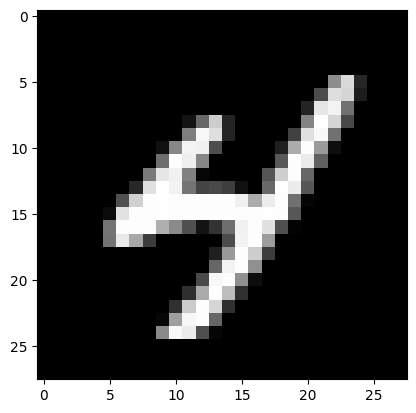

In [23]:
plt.imshow(np.array(trainx.iloc[0,:]).reshape(28,28))

In [32]:
newone=np.empty(len(trainx.iloc[:1000,:]),dtype=np.int32)

In [40]:
y_representative_digits.shape

(50,)